In [13]:
import pandas as pd

df = pd.read_csv('output/valeurs_foncieres_cleaned.csv', sep=',')

/var/folders/4p/b2z8znkj2_q5zj_03_ts9tnr0000gn/T/ipykernel_7546/1917970994.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output/valeurs_foncieres_cleaned.csv', sep=',')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069214 entries, 0 to 9069213
Data columns (total 22 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   no_disposition             int64  
 1   date_mutation              object 
 2   nature_mutation            object 
 3   valeur_fonciere            float64
 4   no_voie                    float64
 5   type_de_voie               object 
 6   code_voie                  object 
 7   voie                       object 
 8   code_postal                float64
 9   commune                    object 
 10  code_departement           object 
 11  code_commune               int64  
 12  prefixe_de_section         float64
 13  section                    object 
 14  no_plan                    int64  
 15  no_volume                  float64
 16  code_type_local            float64
 17  type_local                 object 
 18  surface_reelle_bati        float64
 19  nombre_pieces_principales  float64
 20  na

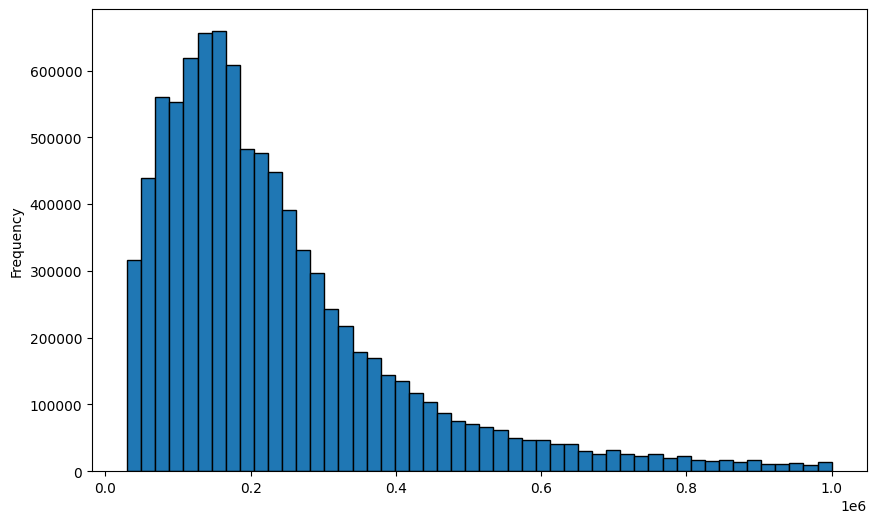

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df['valeur_fonciere'].plot(kind='hist', bins=50, edgecolor='black')
# plt.title("Distribution des valeurs foncières")
# plt.xlabel("Valeur foncière (€)")
# plt.ylabel("Nombre de transactions")
# plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

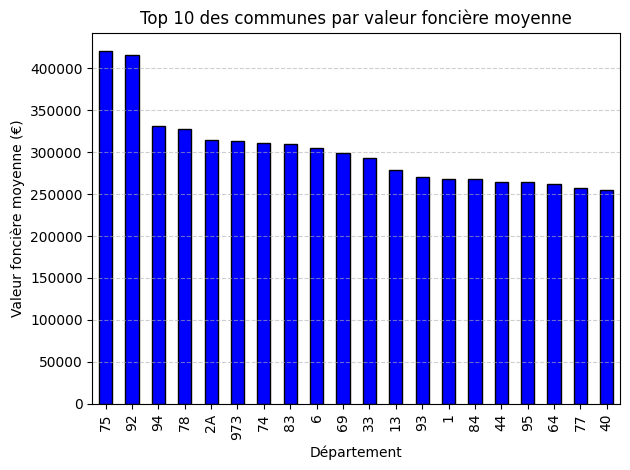

In [10]:
top_communes = (
    df.groupby('code_departement')['valeur_fonciere']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

top_communes.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Top 10 des communes par valeur foncière moyenne")
plt.xlabel("Département")
plt.ylabel("Valeur foncière moyenne (€)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [12]:
chunk_size = 500000
num_chunks = len(df) // chunk_size + 1

for i in range(num_chunks):
    start_row = i * chunk_size
    end_row = min((i + 1) * chunk_size, len(df))
    chunk = df.iloc[start_row:end_row]
    chunk.to_csv(f'output/valeurs_foncieres_cleaned_part_{i+1}.csv', index=False)

In [14]:
df_values = df['valeur_fonciere']

df_values.to_csv('output/valeurs_foncieres_series.csv', index=False)

In [17]:
df['valeur_fonciere'].mean()

239797.76992223572